In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
data = {"train": "../dataset/OCT2017/train/", 
        "test": "../dataset/OCT2017/test/"}

imgs_path = {"train": [], 
             "test": []}

classes = ['DRUSEN', 'CNV', 'DME', 'NORMAL']

for cls_name in classes:
    for key in data:
        for name in os.listdir(os.path.join(data[key], cls_name)):
            if not name.startswith("."):
                imgs_path[key].append(os.path.join(data[key], cls_name, name))

In [4]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(20, 9))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

### Train visualize

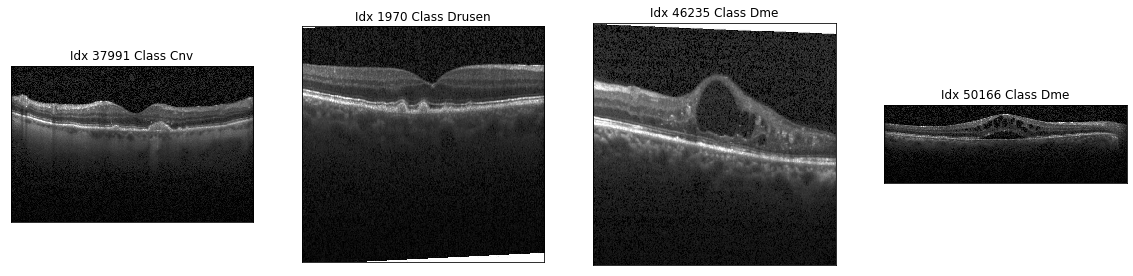

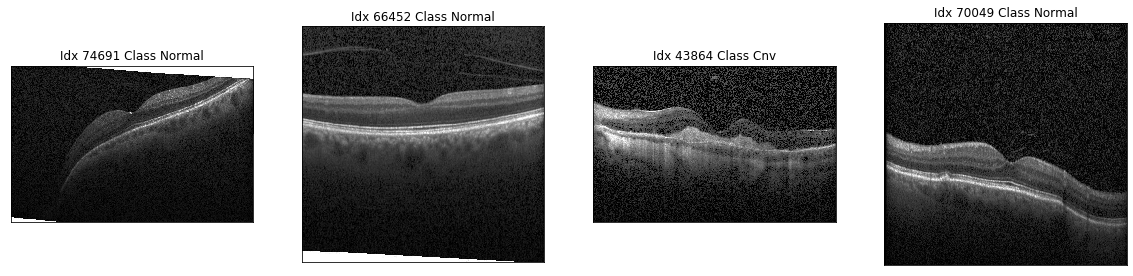

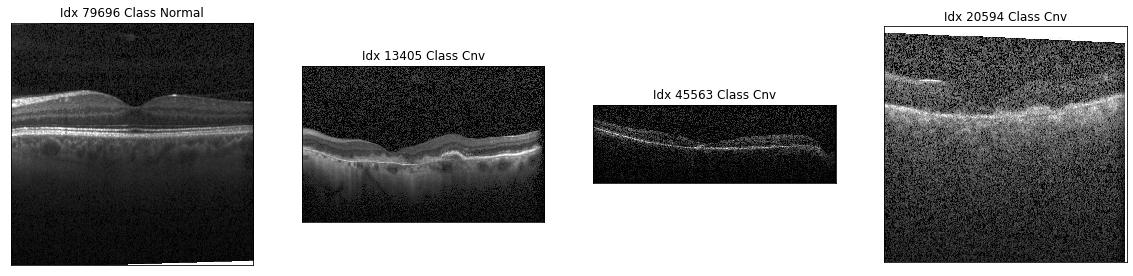

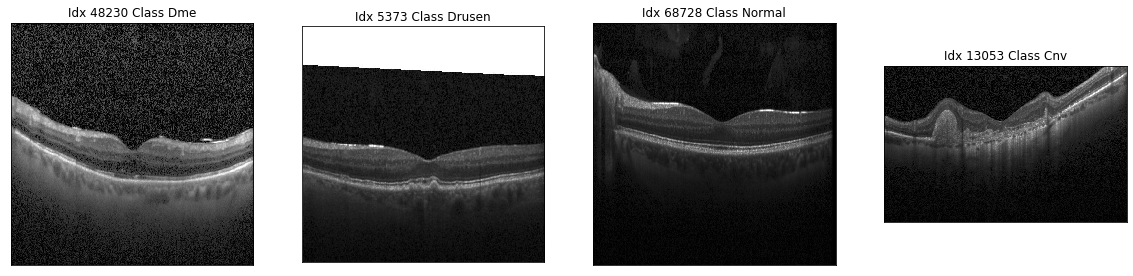

In [5]:
for_print = {}
for idx in np.random.randint(len(imgs_path["train"]), size=16):
    img = cv2.imread(imgs_path["train"][idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cls_img = imgs_path["train"][idx].split("/")[-2]
    for_print[f"Idx {idx} Class {cls_img}"] = img
    if len(for_print) != 0 and (len(for_print) % 4) == 0:
        visualize(**for_print)
        for_print = {}

### Test visuilize

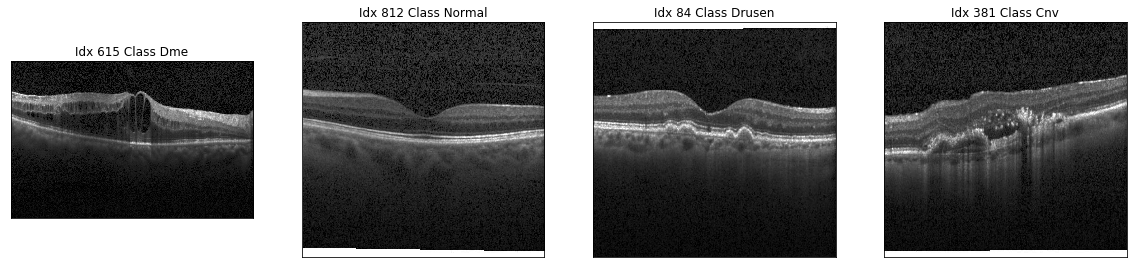

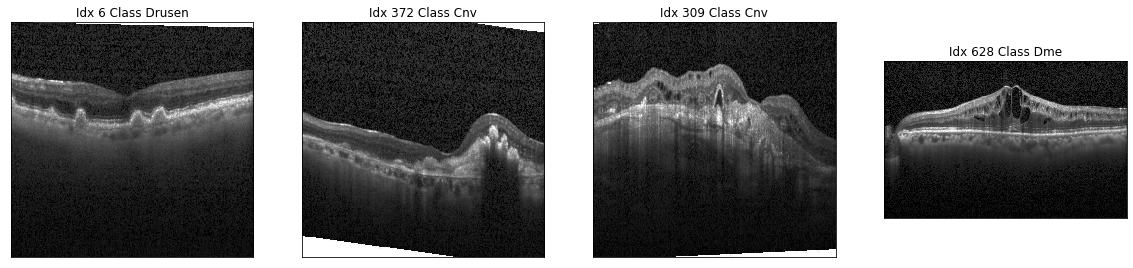

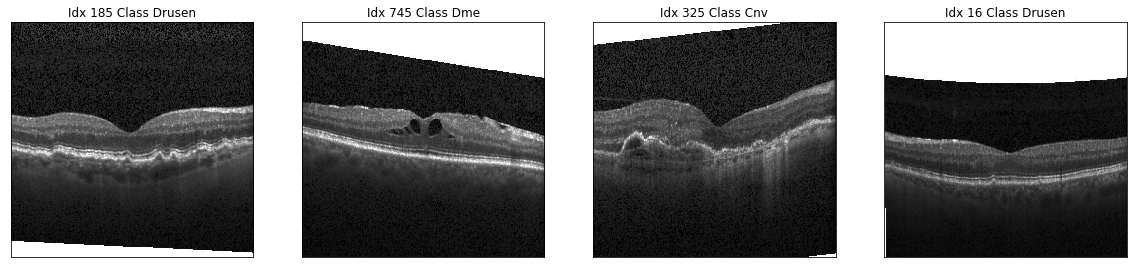

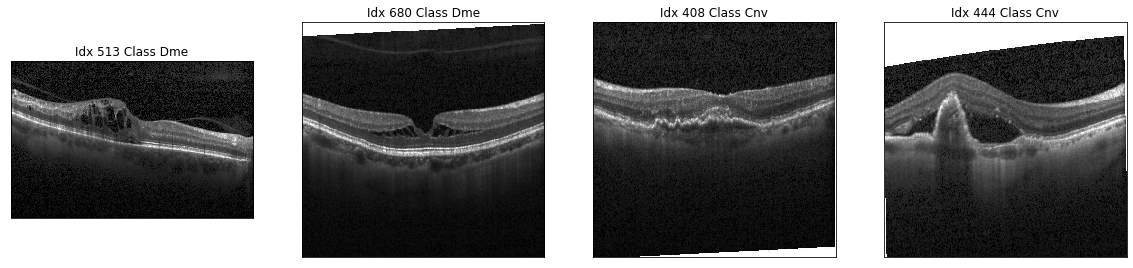

In [6]:
for_print = {}
for idx in np.random.randint(len(imgs_path["test"]), size=16):
    img = cv2.imread(imgs_path["test"][idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cls_img = imgs_path["test"][idx].split("/")[-2]
    for_print[f"Idx {idx} Class {cls_img}"] = img
    if len(for_print) != 0 and (len(for_print) % 4) == 0:
        visualize(**for_print)
        for_print = {}

#### Let's look at the balance of classes

In [12]:
labels = {key: [img_p.split("/")[-2] for img_p in imgs_path[key]] for key in imgs_path} 
pationt_id = {key: [int(img_p.split("/")[-1].split("-")[-2]) for img_p in imgs_path[key]] for key in imgs_path}
num_img = {key: [img_p.split("/")[-1].split("-")[-1].split(".")[0] for img_p in imgs_path[key]] for key in imgs_path}

In [39]:
train = pd.DataFrame(zip(imgs_path["train"], labels["train"], pationt_id["train"], \
                         num_img["train"]), columns=["path", "class", "patient_id", \
                                                    "num_img"])
test = pd.DataFrame(zip(imgs_path["test"], labels["test"], pationt_id["test"], \
                         num_img["test"]), columns=["path", "class", "patient_id", \
                                                    "num_img"])

In [40]:
train.head()

path   class  patient_id  \
0  ../dataset/OCT2017/train/DRUSEN/DRUSEN-8023853...  DRUSEN     8023853   
1  ../dataset/OCT2017/train/DRUSEN/DRUSEN-783692-...  DRUSEN      783692   
2  ../dataset/OCT2017/train/DRUSEN/DRUSEN-8086850...  DRUSEN     8086850   
3  ../dataset/OCT2017/train/DRUSEN/DRUSEN-6102438...  DRUSEN     6102438   
4  ../dataset/OCT2017/train/DRUSEN/DRUSEN-7555604...  DRUSEN     7555604   

  num_img  
0      23  
1       4  
2      14  
3       2  
4      11

In [41]:
test.head()

path   class  patient_id  \
0  ../dataset/OCT2017/test/DRUSEN/DRUSEN-8345703-...  DRUSEN     8345703   
1  ../dataset/OCT2017/test/DRUSEN/DRUSEN-2257047-...  DRUSEN     2257047   
2  ../dataset/OCT2017/test/DRUSEN/DRUSEN-6193297-...  DRUSEN     6193297   
3  ../dataset/OCT2017/test/DRUSEN/DRUSEN-783692-1...  DRUSEN      783692   
4  ../dataset/OCT2017/test/DRUSEN/DRUSEN-2185112-...  DRUSEN     2185112   

  num_img  
0       2  
1       2  
2       5  
3       1  
4       1

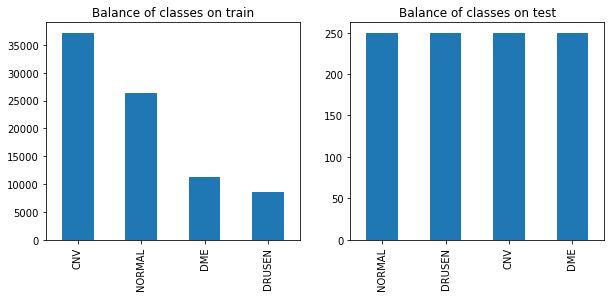

In [42]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
train['class'].value_counts().plot.bar()
plt.title("Balance of classes on train")

plt.subplot(122)
test['class'].value_counts().plot.bar()
plt.title("Balance of classes on test");

In [43]:
print(f"Unique patients in train is {len(train['patient_id'].value_counts())}")
print(f"Unique patients in test is {len(test['patient_id'].value_counts())}")

Unique pationts in train is 4590
Unique pationts in test is 633


In [38]:
train['patient_id'].value_counts()

1188386    813
6652117    613
6666538    585
7907754    469
9374492    459
          ... 
7039800      1
9714913      1
412089       1
1887215      1
8687514      1
Name: pationt_id, Length: 4590, dtype: int64

#### Let's look at the pictures of the most common patient

In [44]:
idx = train[train['patient_id'] == 1188386]

path class  patient_id  \
8658    ../dataset/OCT2017/train/CNV/CNV-1188386-98.jpeg   CNV     1188386   
8698   ../dataset/OCT2017/train/CNV/CNV-1188386-439.jpeg   CNV     1188386   
8710   ../dataset/OCT2017/train/CNV/CNV-1188386-309.jpeg   CNV     1188386   
8771   ../dataset/OCT2017/train/CNV/CNV-1188386-502.jpeg   CNV     1188386   
8866   ../dataset/OCT2017/train/CNV/CNV-1188386-364.jpeg   CNV     1188386   
...                                                  ...   ...         ...   
45718  ../dataset/OCT2017/train/CNV/CNV-1188386-808.jpeg   CNV     1188386   
45736  ../dataset/OCT2017/train/CNV/CNV-1188386-598.jpeg   CNV     1188386   
45746  ../dataset/OCT2017/train/CNV/CNV-1188386-775.jpeg   CNV     1188386   
45780  ../dataset/OCT2017/train/CNV/CNV-1188386-234.jpeg   CNV     1188386   
45817  ../dataset/OCT2017/train/CNV/CNV-1188386-772.jpeg   CNV     1188386   

      num_img  
8658       98  
8698      439  
8710      309  
8771      502  
8866      364  
...       ...  
45718     808  
45736     598  
45746     775  
45780     234  
45817     772  

[813 rows x 4 columns]

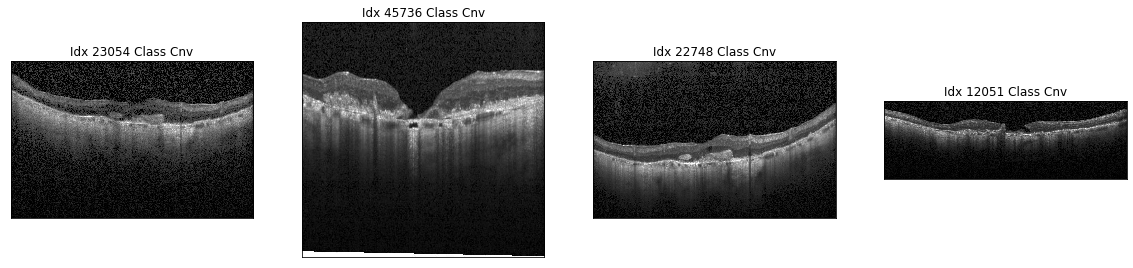

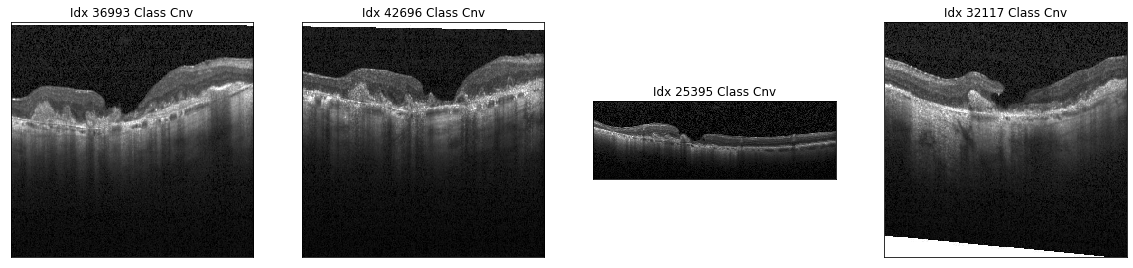

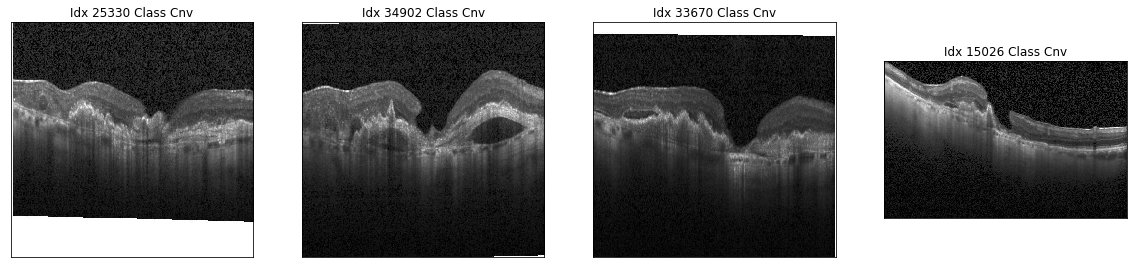

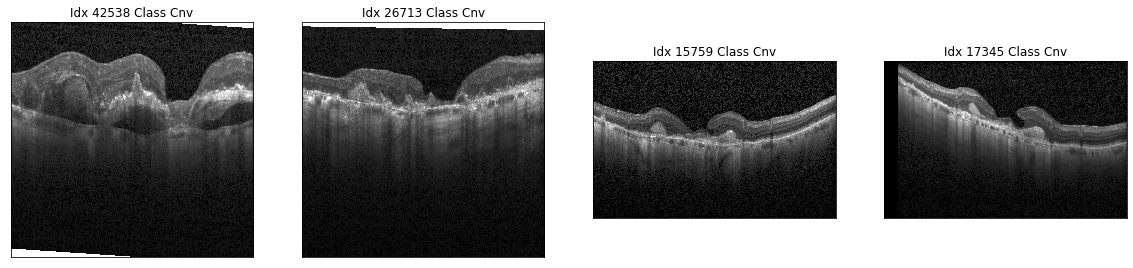

In [52]:
for_print = {}
for idx in np.random.choice(train[train['patient_id'] == 1188386].index, 16):
    img = cv2.imread(imgs_path["train"][idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cls_img = imgs_path["train"][idx].split("/")[-2]
    for_print[f"Idx {idx} Class {cls_img}"] = img
    if len(for_print) != 0 and (len(for_print) % 4) == 0:
        visualize(**for_print)
        for_print = {}